In [2]:
import pandas as pd 
%matplotlib inline
import cufflinks as cf
import plotly.offline as plyo # 导入离线绘图功能
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()



In [151]:
df = pd.read_csv(r"C:\Users\18484\Desktop\全部数据\附件2-行业日负荷数据.csv")
weather = pd.read_csv(r"C:\Users\18484\Desktop\全部数据\附件3-气象数据.csv")

In [152]:
weather['最高温度'] = weather['最高温度'].map(lambda d: d.replace('℃','')).astype(int)
weather['最低温度'] = weather['最低温度'].map(lambda d: d.replace('℃','')).astype(int)
weather['start_weather'] = weather['天气状况'].apply(lambda x: x.split('/')[0])
weather['end_weather'] = weather['天气状况'].apply(lambda x: x.split('/')[1])

dic1 = {'晴':0,'晴间多云':1, '多云':2, '局部多云':2,'阴':3 ,'雾':4, '小雨':5, '小到中雨':6, '小雨-中雨':6, '中雨':7, '阵雨':8,
 '中雨-大雨':9, '中到大雨':9, '大雨':9,'雷阵雨':10, '大到暴雨':11, '暴雨':12}
dic2 = {'无持续风向<3级':3, '北风4～5级':6, '微风<3级':3, '北风3':4, '东北风3～4级':5, '北风3～4级':5,
       '南风3～4级':5, '南风4～5级':6, '东北偏东风2':2, '无持续风向微风':0, '无持续风向1-2级':1, '东风3-4级':5,
       '东南风4-5级':6, '东风3～4级':5, '东北风3-4级':5, '东风8-9级':7, '东南风3-4级':5, '北风3-4级':5,
       '北风4-5级':6, '南风3-4级':5, '南风1-2级':1, '东南风1-2级':1, '西南风3-4级':5, '东风1-2级':1,
       '北风1-2级':1, '东北风1-2级':1, '西南风1-2级':1}
dic3 = {'无持续风向<3级':3, '北风4～5级':6, '北风3～4级':5, '微风<3级':3, '北风3':4, '东北偏东风2':2,
       '无持续风向微风':0, '无持续风向1-2级':1, '东风3-4级':5, '东南风4-5级':6, '东南风3～4级':5, '东北风3-4级':5,
       '东风8-9级':7, '东南风3-4级':5, '北风3-4级':5, '北风4-5级':6, '南风3-4级':5, '南风1-2级':1,
       '东南风1-2级':1, '西南风3-4级':5, '东风1-2级':1, '北风1-2级':1, '东北风1-2级':1, '西南风1-2级':1}

weather['start_weather']=weather['start_weather'].map(dic1)
weather['end_weather']=weather['end_weather'].map(dic1)
weather['白天风力风向']=weather['白天风力风向'].map(dic2)
weather['夜晚风力风向']=weather['夜晚风力风向'].map(dic3)

In [153]:
import pandas as pd
from datetime import datetime
start = datetime(2018, 1, 1)
end = datetime(2021, 8, 31,23)
tm = pd.date_range(start, end, freq='D')#H表示小时hour
time=pd.to_datetime((tm)).strftime('%Y-%m-%d')

In [154]:
pd.DataFrame(time)

0
0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
...          ...
1334  2021-08-27
1335  2021-08-28
1336  2021-08-29
1337  2021-08-30
1338  2021-08-31

[1339 rows x 1 columns]

In [155]:
df = df.rename(columns={'数据时间':'日期'})

In [156]:
weather  = weather.drop_duplicates(subset='日期')

In [157]:
weather = weather.drop_duplicates(subset='日期').reset_index()

In [158]:
weather['日期'] = pd.DataFrame(time)

In [159]:
weather['日期'] = weather['日期'].astype('str')

In [160]:
weather['日期'].value_counts()

2018-01-01    1
2020-06-18    1
2020-06-16    1
2020-06-15    1
2020-06-14    1
             ..
2019-03-22    1
2019-03-21    1
2019-03-20    1
2019-03-19    1
2021-08-31    1
Name: 日期, Length: 1339, dtype: int64

# 突变量级

In [161]:

metrics_df=pd.pivot_table(df,values='有功功率最大值（kw）',index='日期',columns='行业类型')
metrics_df = metrics_df.merge(weather,on='日期',how='left')

In [162]:
metrics_df.reset_index(inplace=True)
metrics_df.fillna(0,inplace=True)
metrics_df.head()
# metrics_df = metrics_df.rename(columns={'数据时间':'日期'})

level_0          日期           商业        大工业用电        普通工业  非普工业  index  \
0        0  2019-01-01   64027.8582  117888.3300   6179.9364   0.0    366   
1        1  2019-01-02   75467.2143  126843.7914  10711.9704   0.0    367   
2        2  2019-01-03  132776.9442  130286.1294  10079.0262   0.0    368   
3        3  2019-01-04   97731.1308  133018.6344   9713.3055   0.0    369   
4        4  2019-01-05  132883.1868  133504.4784   6958.3842   0.0    370   

    天气状况  最高温度  最低温度  白天风力风向  夜晚风力风向  start_weather  end_weather  
0    阴/阴    12     7       1       1              3            3  
1  小雨/小雨    11     6       1       1              5            5  
2  多云/小雨    15     9       1       1              2            5  
3   阴/小雨    17    12       1       1              3            5  
4   阴/小雨    17    12       1       1              3            5

In [97]:
metrics_df  = metrics_df.drop(['level_0','index','天气状况'],axis=1)

In [124]:
metrics_df.to_csv('第二大问最大值.csv',index=0)

In [163]:
import seaborn as sns 

In [164]:
df = metrics_df

In [178]:
metrics_df['日期'] = pd.to_datetime(metrics_df['日期'])
metrics_df['year'] = metrics_df['日期'].dt.year
metrics_df['month'] = metrics_df['日期'].dt.month
metrics_df['day'] = metrics_df['日期'].dt.day

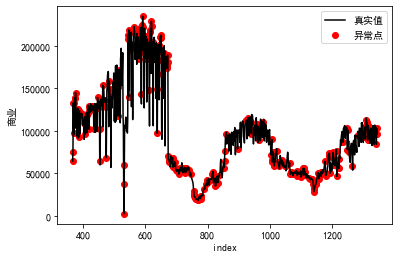

In [182]:
data = metrics_df[['商业', '最高温度', '最低温度', '白天风力风向','夜晚风力风向','start_weather','end_weather','year','month','day']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest
model = IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(data)
df['anomaly2'] = pd.Series(model.predict(data))
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
f, ax = plt.subplots(1)
a = df.loc[df['anomaly2'] == -1, ['index', '商业']] #anomaly
sns.lineplot(x=df['index'], y=df['商业'], ax=ax, color='black', label='真实值')
# ax.plot(df['日期'], df['商业'], color='black', label = 'Normal')
ax.scatter(a['index'],a['商业'], color='red', label = '异常点')
plt.legend()
plt.savefig('商业异常检测结果.jpg',dpi=400)
plt.show()

In [122]:
# specify the 12 metrics column names to be modelled
to_model_columns=metrics_df.columns[4:12]
 
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(metrics_df[to_model_columns])

pred = clf.predict(metrics_df[to_model_columns])
metrics_df['anomaly']=pred
outliers=metrics_df.loc[metrics_df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(metrics_df['anomaly'].value_counts())

 1    602
-1    371
Name: anomaly, dtype: int64


In [119]:
outliers

日期           商业        大工业用电        普通工业       非普工业  最高温度  最低温度  \
0    2019-01-01   64027.8582  117888.3300   6179.9364     0.0000    12     7   
1    2019-01-02   75467.2143  126843.7914  10711.9704     0.0000    11     6   
2    2019-01-03  132776.9442  130286.1294  10079.0262     0.0000    15     9   
8    2019-01-09  123301.8492  125720.6202   9560.2095     0.0000    18    11   
15   2019-01-16  115901.9559  102722.6280   8757.7587     0.0000    15    10   
..          ...          ...          ...         ...        ...   ...   ...   
933  2021-07-23  104267.7330  112812.5484   9053.7240  3136.7058    37    27   
934  2021-07-24  100232.7180  110385.8586   6484.3338  2698.9716    37    27   
938  2021-07-28  112806.1386  105702.3792   9276.7578  3383.8500    37    28   
939  2021-07-29  110454.1776  106409.4258   9234.5556  3374.1450    36    26   
962  2021-08-21   96453.0618  100231.5336   5820.4116  2531.5920    36    27   

     白天风力风向  夜晚风力风向  start_weather  end_weather  anomaly  
0         1       1              3            3       -1  
1         1       1              5            5       -1  
2         1       1              2            5       -1  
8         1       1              3            5       -1  
15        5       5              3            3       -1  
..      ...     ...            ...          ...      ...  
933       1       1              0            0       -1  
934       1       1              2            0       -1  
938       1       1             10           10       -1  
939       1       1              7           10       -1  
962       1       1              0            0       -1  

[289 rows x 12 columns]

In [118]:
pd.DataFrame(pca.transform(metrics_df[to_model_columns]))

0          1
0   -1760.263983  17.510542
1   -1760.266400  18.275423
2   -1760.257396  14.007276
3   -1760.251117  10.379202
4   -1760.251117  10.379202
..           ...        ...
968  1447.486380  -7.928904
969   657.954601  -6.966326
970   725.875515  -6.440330
971  1555.973729  -6.435180
972  1463.472770  -5.587776

[973 rows x 2 columns]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(metrics_df[to_model_columns])
import numpy as np 
 
res=pd.DataFrame(pca.transform(metrics_df[to_model_columns]))
std_scale = preprocessing.StandardScaler().fit(res)
df_std = std_scale.transform(res)
res = pd.DataFrame(df_std)
# Z = np.array(res)
# figsize=(7, 5)
# plt.figure(figsize=figsize)
plt.title("IsolationForest")

from scipy import stats
xx, yy = np.meshgrid(np.linspace(-4, 4, 200), np.linspace(-4, 4, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy,Z, cmap=plt.cm.Blues_r)
scores_pred = clf.decision_function(res)
threshold = stats.scoreatpercentile(scores_pred, 100 * 0.6)  #根据训练样本中异常样本比例，得到阈值，用于绘图
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=1, colors='red')  #绘制异常点区域和正常点区域的边界
b1 = plt.scatter(res[0], res[1], c='green',
                 s=40,edgecolor="k",label="normal points")
 
b2 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="k",label="predicted outliers")
plt.legend([a.collections[0], b1, b2],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper right")
plt.savefig('异常突变检测.png')
plt.show()

C:\Users\18484\AppData\Local\Temp/ipykernel_4276/3937969736.py:16: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



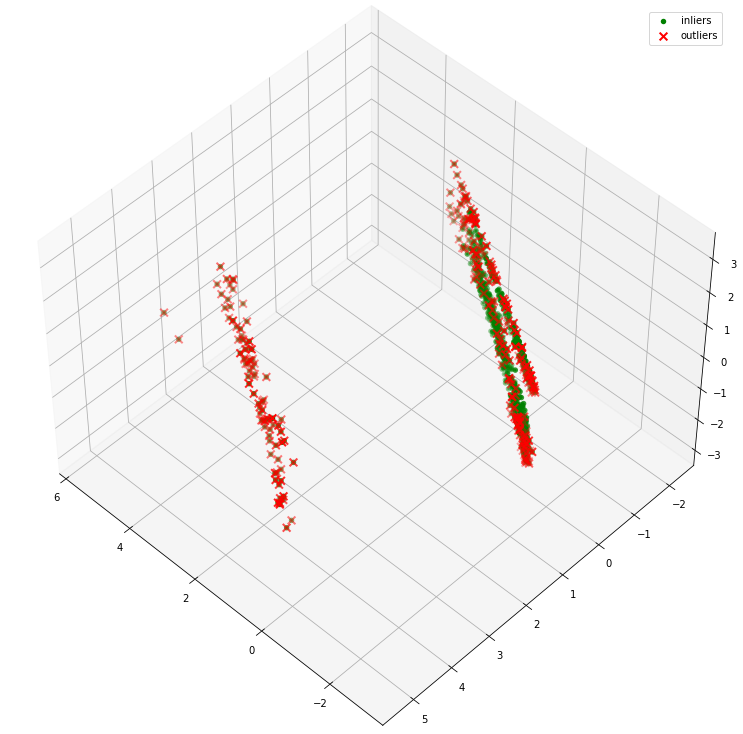

In [108]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(metrics_df[to_model_columns])
X_reduce = pca.fit_transform(X)
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
fig = plt.figure(1, figsize=(7,7))

ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=6, lw=3, label="inliers",c="green")
 
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.savefig('突变分类.jpg')
plt.show()

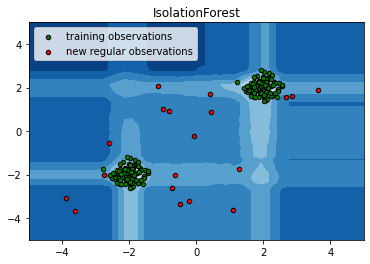

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
# y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green',
                 s=20, edgecolor='k')
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
#                  s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [110]:
import pandas as pd
from sklearn import preprocessing

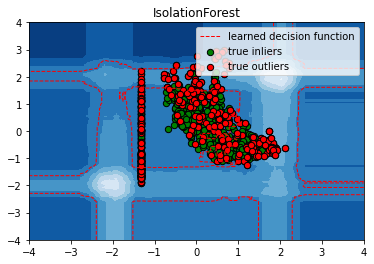

In [111]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(metrics_df[to_model_columns])
import numpy as np 
 
res=pd.DataFrame(pca.transform(metrics_df[to_model_columns]))
std_scale = preprocessing.StandardScaler().fit(res)
df_std = std_scale.transform(res)
res = pd.DataFrame(df_std)
# Z = np.array(res)
# figsize=(7, 5)
# plt.figure(figsize=figsize)
plt.title("IsolationForest")

from scipy import stats
xx, yy = np.meshgrid(np.linspace(-4, 4, 200), np.linspace(-4, 4, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy,Z, cmap=plt.cm.Blues_r)
scores_pred = clf.decision_function(res)
threshold = stats.scoreatpercentile(scores_pred, 100 * 0.6)  #根据训练样本中异常样本比例，得到阈值，用于绘图
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=1, colors='red')  #绘制异常点区域和正常点区域的边界
b1 = plt.scatter(res[0], res[1], c='green',
                 s=40,edgecolor="k",label="normal points")
 
b2 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="k",label="predicted outliers")
plt.legend([a.collections[0], b1, b2],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper right")
plt.savefig('异常突变检测.png')
plt.show()

In [112]:
res 

0         1
0   -1.312298  2.115521
1   -1.312300  2.207930
2   -1.312293  1.692277
3   -1.312289  1.253955
4   -1.312289  1.253955
..        ...       ...
968  1.079119 -0.957924
969  0.490513 -0.841631
970  0.541149 -0.778083
971  1.159997 -0.777461
972  1.091037 -0.675082

[973 rows x 2 columns]

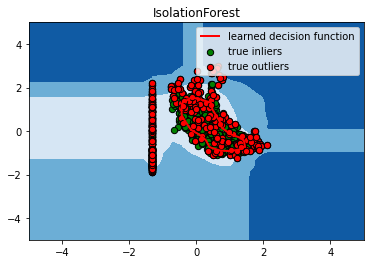

In [113]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy import stats
 
rng = np.random.RandomState(42)
 
# 构造训练样本
# n_samples = 200  #样本总数
outliers_fraction = 0.5  #异常样本比例
# n_inliers = int((1. - outliers_fraction) * n_samples)
# n_outliers = int(outliers_fraction * n_samples)
 
# X = 0.3 * rng.randn(n_inliers // 2, 2)
# X_train = np.r_[X + 2, X - 2]   #正常样本
X_train = res
 
# fit the model
clf = IsolationForest(max_samples='auto', random_state=rng, contamination=outliers_fraction)
clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(X_train)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图
 
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.title("IsolationForest")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 4), cmap=plt.cm.Blues_r)  #绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  #绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  #绘制正常点区域，值从阈值到最大的那部分
 
b = plt.scatter(res[0], res[1], c='green',
                 s=40,edgecolor="k",label="normal points")
 
c = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="k",label="predicted outliers")
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper right")
plt.show()

In [114]:
pd.DataFrame(X_train)

0         1
0   -1.312298  2.115521
1   -1.312300  2.207930
2   -1.312293  1.692277
3   -1.312289  1.253955
4   -1.312289  1.253955
..        ...       ...
968  1.079119 -0.957924
969  0.490513 -0.841631
970  0.541149 -0.778083
971  1.159997 -0.777461
972  1.091037 -0.675082

[973 rows x 2 columns]

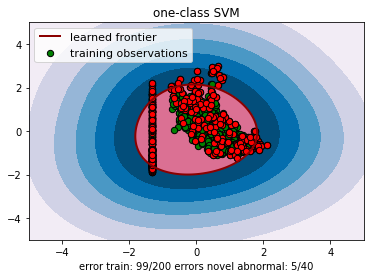

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(res)
X_train =np.array(res)
y_pred_train = clf.predict(res)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

plt.title("one-class SVM")
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1],edgecolor='k', c='green', s=s)
# b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], edgecolor='k',c='red', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, c],
           ["learned frontier", "training observations",
            ],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_outliers))
plt.show()

In [34]:
from chart_studio import plotly as py

In [35]:
def classify_anomalies(df,metric_name):
    df['metric_name']=metric_name
    df = df.sort_values(by='数据时间', ascending=False)
    #Shift actuals by one timestamp to find the percentage chage between current and previous data point
    df['shift'] = df['有功功率最大值（kw）'].shift(-1)
    df['percentage_change'] = ((df['有功功率最大值（kw）'] - df['shift']) / df['有功功率最大值（kw）']) * 100
    #Categorise anomalies as 0-no anomaly, 1- low anomaly , 2 - high anomaly
    df['anomaly'].loc[df['anomaly'] == 1] = 0
    df['anomaly'].loc[df['anomaly'] == -1] = 2
    df['anomaly_class'] = df['anomaly']
    max_anomaly_score = df['score'].loc[df['anomaly_class'] == 2].max()
    medium_percentile = df['score'].quantile(0.24)
    df['anomaly_class'].loc[(df['score'] > max_anomaly_score) & (df['score'] <= medium_percentile)] = 1
    return df

In [36]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from chart_studio import plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
def plot_anomaly(df,metric_name):
    df.数据时间 = pd.to_datetime(df['数据时间'])
    dates = df.数据时间
    #identify the anomaly points and create a array of its values for plot
    bool_array = (abs(df['anomaly']) > 0)
    actuals = df["有功功率最大值（kw）"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
    #A dictionary for conditional format table based on anomaly
    color_map = {0: "rgba(228, 222, 249, 0.65)", 1: "yellow", 2: "red"}
    
    #Table which includes Date,Actuals,Change occured from previous point
    table = go.Table(
        domain=dict(x=[0, 1],
                    y=[0, 0.3]),
        columnwidth=[1, 2],
        # columnorder=[0, 1, 2,],
        header=dict(height=20,
                    values=[['<b>Date</b>'], ['<b>Actual Values </b>'], ['<b>% Change </b>'],
                            ],
                    font=dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                    fill=dict(color='#d562be')),
        cells=dict(values=[df.round(3)[k].tolist() for k in ['数据时间', '有功功率最大值（kw）', 'percentage_change']],
                   line=dict(color='#506784'),
                   align=['center'] * 5,
                   font=dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                   # format = [None] + [",.4f"] + [',.4f'],
                   # suffix=[None] * 4,
                   suffix=[None] + [''] + [''] + ['%'] + [''],
                   height=27,
                   fill=dict(color=[test_df['anomaly_class'].map(color_map)],#map based on anomaly level from dictionary
                   )
                   ))
    #Plot the actuals points
    Actuals = go.Scatter(name='Actuals',
                         x=dates,
                         y=df['有功功率最大值（kw）'],
                         xaxis='x1', yaxis='y1',
                         mode='lines',
                         marker=dict(size=6,
                                     line=dict(width=1),
                                     color="black"))
 
    #Highlight the anomaly points
    anomalies_map = go.Scatter(name="Anomaly",
                               showlegend=True,
                               x=dates,
                               y=anomaly_points,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color="red",
                                           size=6,
                                           line=dict(
                                               color="red",
                                               width=1)))
 
 
    axis = dict(
        showline=True,
        zeroline=False,
        showgrid=True,
        mirror=True,
        ticklen=4,
        gridcolor='#FFFFFF',
        tickfont=dict(size=10))
 
    layout = dict(
        width=1000,
        height=865,
        autosize=False,
        title=metric_name,
        margin=dict(t=75),
        showlegend=True,
        xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
        yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20, 1], anchor='x1', hoverformat='.2f')))
    data=[anomalies_map, Actuals]
    fig = go.Figure(data=[table, anomalies_map, Actuals], layout=layout)
    
    iplot(fig)
    pyplot.show()
#     return anomalies_map

In [37]:
import warnings  
warnings.filterwarnings('ignore')
for i in range(1,len(metrics_df.columns)-1):
    clf.fit(metrics_df.iloc[:,i:i+1])
    pred = clf.predict(metrics_df.iloc[:,i:i+1])
    test_df=pd.DataFrame()
    test_df['数据时间']=metrics_df['数据时间']
    #Find decision function to find the score and classify anomalies
    test_df['score']=clf.decision_function(metrics_df.iloc[:,i:i+1])
    test_df['有功功率最大值（kw）']=metrics_df.iloc[:,i:i+1]
    test_df['anomaly']=pred
    #Get the indexes of outliers in order to compare the metrics with use case anomalies if required
    outliers=test_df.loc[test_df['anomaly']==-1]
    outlier_index=list(outliers.index)
    test_df=classify_anomalies(test_df,metrics_df.columns[i])
    plot_anomaly(test_df,metrics_df.columns[i])